<a href="https://colab.research.google.com/github/BrunoMachadoF/Analysis-Classification/blob/main/MVP_An%C3%A1lise_e_Previs%C3%A3o_da_Evas%C3%A3o_Acad%C3%AAmica_de_Estudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Análise de Dados - Análise e Previsão da Evasão Acadêmica de Estudantes**


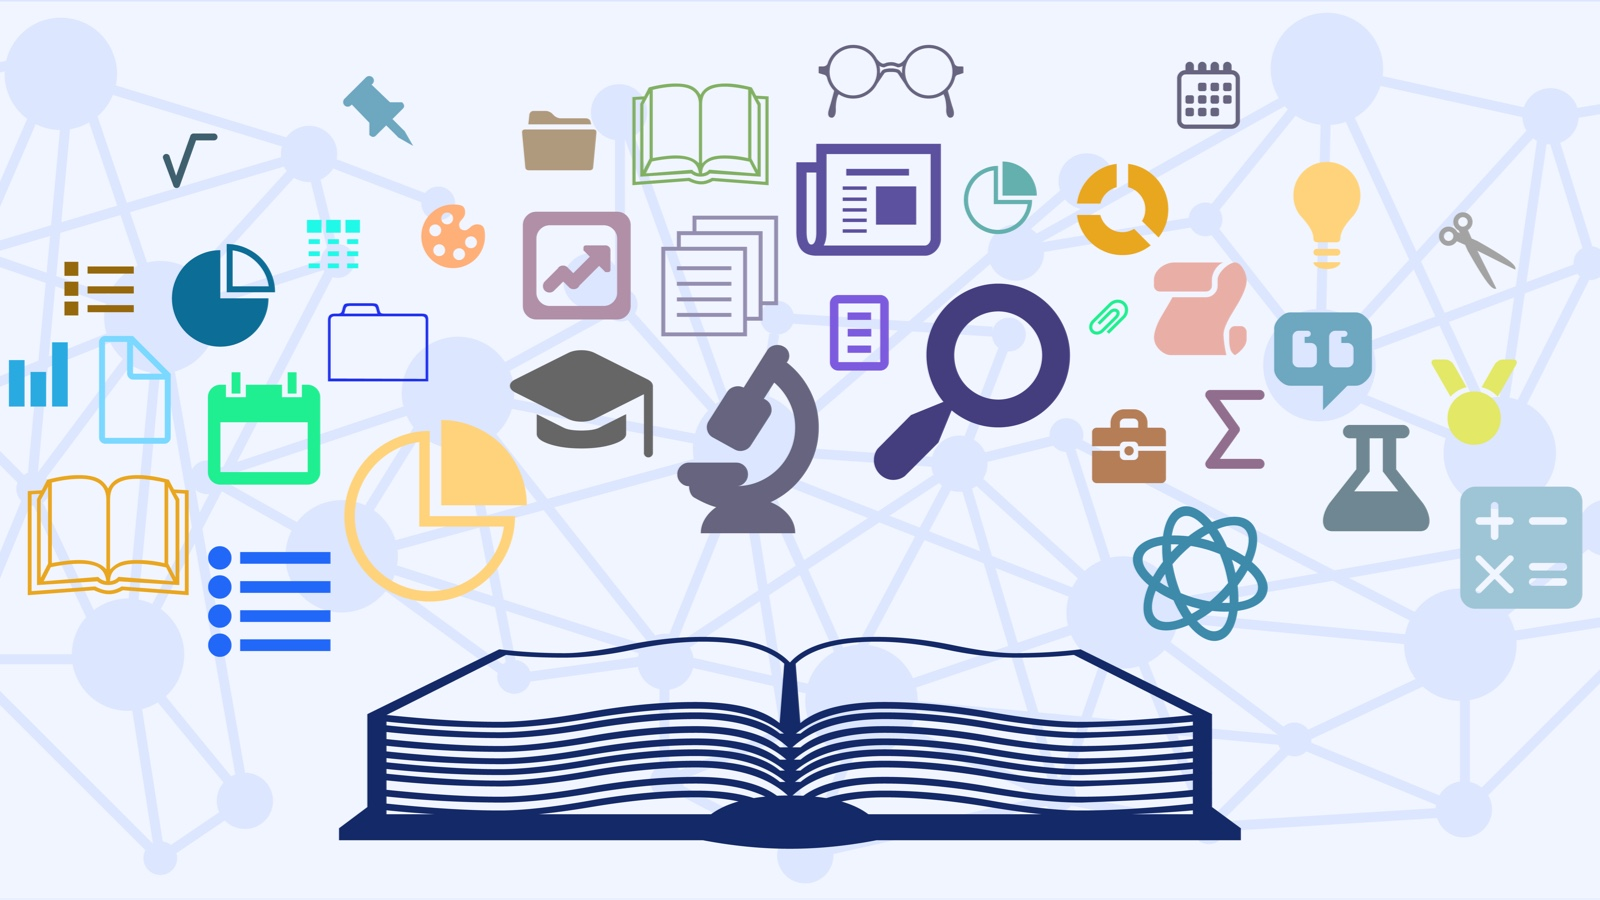

Este projeto serve como MVP para a disciplina de Análise de Dados da pós-graduação da PUC Rio. O objetivo do notebook é investigar as principais motivações que levam um estudante a desistir dos estudos, respondendo às seguintes perguntas:

- Estudantes internacionais têm maior probabilidade de desistir?

- Qual é a idade média de ingresso dos alunos que desistiram?

- Qual curso tem mais matrículas?

- Quais cursos apresentam a maior taxa de desistências?

- Qual nacionalidade apresenta a maior taxa de desistência?

- Qual gênero tem a maior taxa de desistência?

- Qual turno de curso tem a maior taxa de desistência, diurno ou noturno?

Após a análise, será desenvolvido um algoritmo de machine learning para prever quais alunos atualmente matriculados têm maior probabilidade de desistir do curso.

**Estrutura do Projeto:**

1. **Importação das Bibliotecas:** Bibliotecas essenciais para análise de dados, processamento e aprendizado de máquina foram importadas.
   
2. **Análise dos Dados:** O dataset foi carregado e analisado para compreender as suas características principais e como estas influenciam a variável de interesse.
   
3. **Pré-processamento:** Tratamento de valores ausentes, transformação conforme necessário e codificação de variáveis categóricas.
   
4. **Criação e Avaliação dos Modelos:** Os efeitos do pré processamento serão avaliados através das métricas aplicadas em um modelo de regressão logística simples e em uma rede neural recorrente (RNN).
   
5. **Conclusão:** Resumo das principais etapas do projeto e dos resultados obtidos.

**Créditos:**

Este projeto foi desenvolvido e documentado por Bruno Machado Ferreira.

**LinkedIn:**

[www.linkedin.com/in/bruno-machado-ferreira-67888019a](www.linkedin.com/in/bruno-machado-ferreira-67888019a)

**Dataset:**

O dataset utilizado é proveniente da UCI Machine Learning Repository:
[Predict Students Dropout and Academic Success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

## **Importação das Bibliotecas Necessárias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

## **Análise dos Dados**

#### **Análise Exploratória dos Dados**

**Função Exploradora**

In [ ]:
def checar_detalhes(dataframe):
    d = {'FORMATO': dataframe.shape,
         'COLUNAS': dataframe.columns,
         'ÍNDICE': dataframe.index,
         'TIPOS DE VALORES': dataframe.dtypes,
         'VALORES DUPLICADOS': dataframe.duplicated().sum(),
         'NÚMERO DE VALORES ÚNICOS': dataframe.nunique(),
         'ALGUM VALOR NULO': dataframe.isnull().values.any(),
         'VALORES NULOS (QUANTIDADE)': dataframe.isnull().sum(),
         'VALORES NULOS (%)': dataframe.isnull().mean() * 100,
         'DESCRIÇÃO.T': dataframe.describe([0, 0.25, 0.50, 0.75, 0.99, 1]).T}
    hashtags = '---------------------------'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"FIM DA LISTA"} {hashtags}')


**Definição dos caminhos para os arquivos CSV**

In [ ]:
# Caminhos atualizados para os arquivos enviados
file_path = 'https://raw.githubusercontent.com/BrunoMachadoF/Analysis-Classification/main/data.csv'

# Transformando os arquivos CSV em DataFrames
try:
    df = pd.read_csv(file_path, sep=";")
except FileNotFoundError as e:
    print(f"Erro ao carregar o arquivo: {e}")
except pd.errors.EmptyDataError as e:
    print(f"Arquivo vazio: {e}")
except Exception as e:
    print(f"Erro desconhecido: {e}")

**Primeiras Linhas dos Dataframes**

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Resumo dos Dados**

In [ ]:
checar_detalhes(df)

--------------------------- FORMATO ---------------------------
(4424, 37)
--------------------------- COLUNAS ---------------------------
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd s

##### **Interpretação**

O dataset utilizado contém 4.424 registros e 37 colunas, abrangendo uma variedade de informações relacionadas ao histórico acadêmico e características pessoais dos estudantes.

##### **Características dos Dados:**

- **Colunas:** Os dados incluem variáveis como status civil, modo de aplicação, curso, notas de admissão, qualificações dos pais, presença de necessidades especiais, situação de inadimplência, gênero, idade na matrícula, entre outros. Além disso, são consideradas informações socioeconômicas, como taxa de desemprego, inflação e PIB.
  
- **Tipos de Valores:** A maioria das variáveis são do tipo inteiro (int64), com algumas colunas de ponto flutuante (float64) e uma coluna categórica como alvo (`Target`).

- **Valores Duplicados e Nulos:** Não há valores duplicados ou nulos no dataset, o que simplifica o pré-processamento.

- **Distribuição e Variedade de Valores:** Algumas variáveis possuem um número limitado de valores únicos (como `Gênero` com 2 valores), enquanto outras apresentam uma grande variação (como `Nota de Admissão` com 620 valores únicos).

##### **Estatísticas Descritivas:**

- **Médias e Desvios:** Os valores médios para variáveis como a idade na matrícula (23 anos) e notas de admissão (cerca de 127) indicam o perfil geral dos estudantes no dataset.
  
- **Intervalos de Valores:** Os valores mínimos e máximos destacam a amplitude de características entre os estudantes, como a idade que varia de 17 a 70 anos.

#####**Considerações para Modelagem:**

A ausência de valores nulos, a variedade de atributos e a necessidade de considerar o balanceamento de classes sugerem que o pré-processamento deve focar em transformar e normalizar os dados para melhorar a precisão dos modelos preditivos.

Este resumo destaca a riqueza dos dados e as etapas necessárias para sua preparação e análise no contexto da previsão de evasão e sucesso acadêmico dos estudantes.

#### **Análise dos Valores na Variável Alvo**

In [ ]:
# Lista
unique_values = df['Target'].unique()
print(unique_values)

['Dropout' 'Graduate' 'Enrolled']


##### **Interpretação**

Dado que o dataset inclui estudantes com o status `'Enrolled'`, o treinamento e teste do modelo de classificação devem ser realizados exclusivamente com estudantes que já concluíram os estudos, com status `'Graduate'`, ou que desistiram, com status `'Dropout'`.

Portanto, a seguir, faremos uma análise da distribuição dessa variável.

##### **Análise da Distribuição da Variável Alvo**

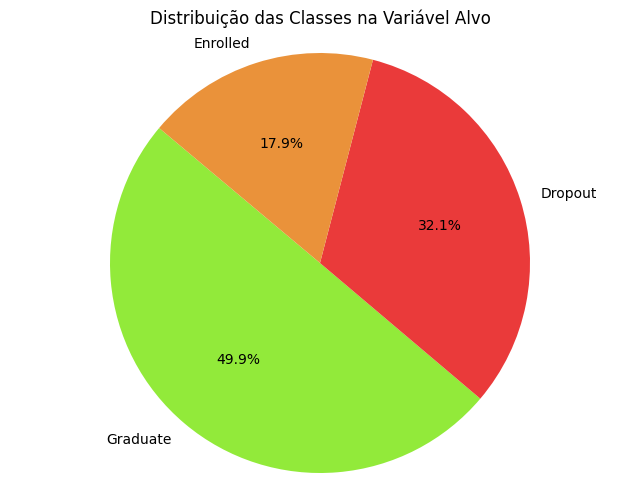

In [ ]:
color_list = ["#92ea3a", "#ea3a3a", "#ea923a"]

# Contagem das classes na coluna 'Target'
class_counts = df['Target'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=color_list)
plt.title('Distribuição das Classes na Variável Alvo')
plt.axis('equal')  # Para manter o gráfico em formato de círculo
plt.show()

- **Graduate (Graduado):** Representa 49,9% dos casos, indicando que quase metade dos alunos no conjunto de dados completou o curso.

- **Dropout (Desistentes):** Corresponde a 32,1% dos casos, mostrando que aproximadamente um terço dos alunos abandonou o curso.

- **Enrolled (Matriculados):** Representa 17,9% dos casos, indicando a menor proporção de alunos, que são aqueles que ainda estão matriculados e ativos no curso.

#### **Avaliação dos Valores Categóricos**

In [ ]:
# Colunas Categóricas
columns = ["Marital status", "Application mode", "Application order",
           "Course", "Daytime/evening attendance\t", "Previous qualification",
           "Nacionality", "Mother's qualification", "Father's occupation",
           "Displaced", "Educational special needs", "Debtor",
           "Tuition fees up to date", "Gender", "Scholarship holder",
           "International"]

# Análise dos Valores
for column in columns:
    print("Coluna : ",column,"\nunique values : ",df[column].unique(),"\n")

Coluna :  Marital status 
unique values :  [1 2 4 3 5 6] 

Coluna :  Application mode 
unique values :  [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27] 

Coluna :  Application order 
unique values :  [5 1 2 4 3 6 9 0] 

Coluna :  Course 
unique values :  [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119] 

Coluna :  Daytime/evening attendance	 
unique values :  [1 0] 

Coluna :  Previous qualification 
unique values :  [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14] 

Coluna :  Nacionality 
unique values :  [  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17] 

Coluna :  Mother's qualification 
unique values :  [19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44] 

Coluna :  Father's occupation 
unique values :  [  9   3   7  10   5   8   4   1   2 124   6   0  90 175 121  99 144 195
 192 161 193 151 182 132 131 194 163 135 143 171 103 172 152 183 122 102
 181 134 12

##### **Interpretação**

De acordo com os metadados fornecidos no UCI temos as seguintes interpretações:

**Marital status:**

1 – single

2 – married

3 – widower

4 – divorced

5 – facto union

6 – legally separated

**Application mode:**

1 - 1st phase - general contingent

2 - Ordinance No. 612/93

5 - 1st phase - special contingent (Azores Island)

7 - Holders of other higher courses

10 - Ordinance No. 854-B/99

15 - International student (bachelor)

16 - 1st phase - special contingent (Madeira Island)

17 - 2nd phase - general contingent

18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan)

27 - Ordinance No. 533-A/99, item b3 (Other Institution)

39 - Over 23 years old

42 - Transfer 43 - Change of course

44 - Technological specialization diploma holders

51 - Change of institution/course

53 - Short cycle diploma holders

57 - Change of institution/course (International)

**Application order:**

Application order (between 0 - first choice; and 9 last choice)

**Course:**

33 - Biofuel Production Technologies

171 - Animation and Multimedia Design

8014 - Social Service (evening attendance)

9003 - Agronomy

9070 - Communication Design

9085 - Veterinary Nursing

9119 - Informatics Engineering

9130 - Equinculture

9147 - Management

9238 - Social Service

9254 - Tourism

9500 - Nursing

9556 - Oral Hygiene

9670 - Advertising and Marketing Management

9773 - Journalism and Communication

9853 - Basic Education

9991 - Management (evening attendance)

**Daytime/evening attendance:**

1 – daytime

0 - evening

**Previous qualification:**

1 - Secondary education

2 - Higher education - bachelor's degree

3 - Higher education - degree

4 - Higher education - master's

5 - Higher education - doctorate

6 - Frequency of higher education

9 - 12th year of schooling - not completed

10 - 11th year of schooling - not completed

12 - Other - 11th year of schooling

14 - 10th year of schooling

15 - 10th year of schooling - not completed

19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.

38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.

39 - Technological specialization course

40 - Higher education - degree (1st cycle)

42 - Professional higher technical course

43 - Higher education - master (2nd cycle)

**Nacionality**

1 - Portuguese

2 - German

6 - Spanish

11 - Italian

13 - Dutch

14 - English

17 - Lithuanian

21 - Angolan

22 - Cape Verdean

24 - Guinean

25 - Mozambican

26 - Santomean

32 - Turkish

41 - Brazilian

62 - Romanian

100 - Moldova (Republic of)

101 - Mexican

103 - Ukrainian

105 - Russian

108 - Cuban

109 - Colombian

**Mother's qualification**

1 - Secondary Education - 12th Year of Schooling or Eq.

2 - Higher Education - Bachelor's Degree

3 - Higher Education - Degree

4 - Higher Education - Master's

5 - Higher Education - Doctorate

6 - Frequency of Higher Education

9 - 12th Year of Schooling - Not Completed

10 - 11th Year of Schooling - Not Completed

11 - 7th Year (Old)

12 - Other - 11th Year of Schooling

14 - 10th Year of Schooling

18 - General commerce course

19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.

22 - Technical-professional course

26 - 7th year of schooling

27 - 2nd cycle of the general high school course

29 - 9th Year of Schooling - Not Completed

30 - 8th year of schooling

34 - Unknown

35 - Can't read or write

36 - Can read without having a 4th year of schooling

37 - Basic education 1st cycle (4th/5th year) or equiv.

38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.

39 - Technological specialization course 40 - Higher education - degree (1st cycle)

41 - Specialized higher studies course

42 - Professional higher technical course

43 - Higher Education - Master (2nd cycle)

44 - Higher Education - Doctorate (3rd cycle)

**Father's qualification:**

1 - Secondary Education - 12th Year of Schooling or Eq.

2 - Higher Education - Bachelor's Degree

3 - Higher Education - Degree

4 - Higher Education - Master's

5 - Higher Education - Doctorate

6 - Frequency of Higher Education

9 - 12th Year of Schooling - Not Completed

10 - 11th Year of Schooling - Not Completed

11 - 7th Year (Old) 12 - Other - 11th Year of Schooling

13 - 2nd year complementary high school course

14 - 10th Year of Schooling

18 - General commerce course

19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.

20 - Complementary High School Course

22 - Technical-professional course

25 - Complementary High School Course - not concluded

26 - 7th year of schooling

27 - 2nd cycle of the general high school course

29 - 9th Year of Schooling - Not Completed

30 - 8th year of schooling

31 - General Course of Administration and Commerce

33 - Supplementary Accounting and Administration

34 - Unknown

35 - Can't read or write

36 - Can read without having a 4th year of schooling

37 - Basic education 1st cycle (4th/5th year) or equiv.

38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.

39 - Technological specialization course

40 - Higher education - degree (1st cycle)

41 - Specialized higher studies course

42 - Professional higher technical course

43 - Higher Education - Master (2nd cycle)

44 - Higher Education - Doctorate (3rd cycle)

**Mother's occupation:**

0 - Student

1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers

2 - Specialists in Intellectual and Scientific Activities

3 - Intermediate Level Technicians and Professions

4 - Administrative staff

5 - Personal Services, Security and Safety Workers and Sellers

6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry

7 - Skilled Workers in Industry, Construction and Craftsmen

8 - Installation and Machine Operators and Assembly Workers

9 - Unskilled Workers

10 - Armed Forces Professions

90 - Other Situation

99 - (blank)

122 - Health professionals

123 - teachers

125 - Specialists in information and communication technologies (ICT)

131 - Intermediate level science and engineering technicians and professions

132 - Technicians and professionals, of intermediate level of health

134 - Intermediate level technicians from legal, social, sports, cultural and similar services

141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators

144 - Other administrative support staff

151 - personal service workers

152 - sellers

153 - Personal care workers and the like

171 - Skilled construction workers and the like, except electricians

173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like

175 - Workers in food processing, woodworking, clothing and other industries and crafts

191 - cleaning workers

192 - Unskilled workers in agriculture, animal production, fisheries and forestry

193 - Unskilled workers in extractive industry, construction, manufacturing and transport

194 - Meal preparation assistants

**Father's occupation:**

0 - Student

1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers

2 - Specialists in Intellectual and Scientific Activities

3 - Intermediate Level Technicians and Professions

4 - Administrative staff

5 - Personal Services, Security and Safety Workers and Sellers

6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry

7 - Skilled Workers in Industry, Construction and Craftsmen

8 - Installation and Machine Operators and Assembly Workers

9 - Unskilled Workers

10 - Armed Forces Professions

90 - Other Situation

99 - (blank)

101 - Armed Forces Officers

102 - Armed Forces Sergeants

103 - Other Armed Forces personnel

112 - Directors of administrative and commercial services

114 - Hotel, catering, trade and other services directors

121 - Specialists in the physical sciences, mathematics, engineering and related techniques

122 - Health professionals

123 - teachers

124 - Specialists in finance, accounting, administrative organization, public and commercial relations

131 - Intermediate level science and engineering technicians and professions

132 - Technicians and professionals, of intermediate level of health

134 - Intermediate level technicians from legal, social, sports, cultural and similar services

135 - Information and communication technology technicians

141 - Office workers, secretaries in general and data processing operators

143 - Data, accounting, statistical, financial services and registry-related operators

144 - Other administrative support staff

151 - personal service workers

152 - sellers

153 - Personal care workers and the like

154 - Protection and security services personnel

161 - Market-oriented farmers and skilled agricultural and animal production workers

163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence

171 - Skilled construction workers and the like, except electricians

172 - Skilled workers in metallurgy, metalworking and similar

174 - Skilled workers in electricity and electronics

175 - Workers in food processing, woodworking, clothing and other industries and crafts

181 - Fixed plant and machine operators

182 - assembly workers

183 - Vehicle drivers and mobile equipment operators

192 - Unskilled workers in agriculture, animal production, fisheries and forestry

193 - Unskilled workers in extractive industry, construction, manufacturing and transport

194 - Meal preparation assistants

195 - Street vendors (except food) and street service providers

**Displaced:**

1 – yes

0 – no

**Educational special needs:**

1 – yes

0 – no

**Debtor:**

1 – yes

0 – no

**Tuition fees up to date:**

1 – yes

0 – no

**Gender:**

1 - male

0 - female

**Scholarship holder:**

1 – yes

0 – no

**International:**

1 – yes

0 – no

#### **Resposta das Perguntas**

##### **Estudantes internacionais têm maior probabilidade de desistir?**

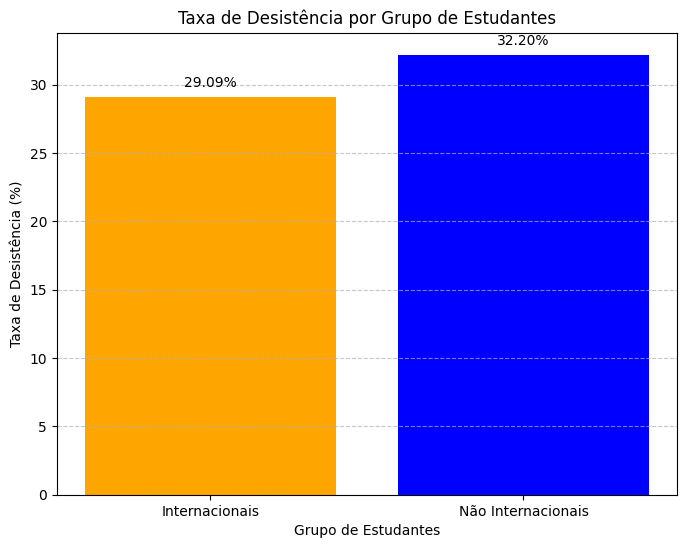

In [ ]:
# Calcular a taxa de desistência para cada grupo
dropout_rate_international = len(df[(df['International'] == 1) & (df['Target'] == 'Dropout')]) / len(df[df['International'] == 1]) * 100
dropout_rate_non_international = len(df[(df['International'] == 0) & (df['Target'] == 'Dropout')]) / len(df[df['International'] == 0]) * 100

# Criar um DataFrame para facilitar a plotagem
dropout_data = pd.DataFrame({
    'Grupo': ['Internacionais', 'Não Internacionais'],
    'Taxa de Desistência (%)': [dropout_rate_international, dropout_rate_non_international]
})

# Plotar o gráfico de barras com rótulos
plt.figure(figsize=(8, 6))
bars = plt.bar(dropout_data['Grupo'], dropout_data['Taxa de Desistência (%)'], color=['orange', 'blue'])

# Adicionar rótulos com a porcentagem correta em cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Taxa de Desistência por Grupo de Estudantes')
plt.ylabel('Taxa de Desistência (%)')
plt.xlabel('Grupo de Estudantes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###### **Interpretação**

O gráfico de barras com rótulos mostra a comparação entre as taxas de desistência de estudantes internacionais e não internacionais.

1. **Estudantes Internacionais:**
   - A taxa de desistência para os estudantes internacionais é de **29,09%**. Isso significa que aproximadamente 29% dos estudantes internacionais no conjunto de dados abandonaram o curso antes de sua conclusão.

2. **Estudantes Não Internacionais:**
   - A taxa de desistência para estudantes não internacionais é de **32,20%**, indicando que cerca de 32% dos estudantes locais decidiram interromper seus estudos.

###### **Conclusão**

Apesar da diferença ser relativamente pequena, o gráfico revela que estudantes não internacionais têm uma taxa de desistência ligeiramente superior (32,20%) em comparação com estudantes internacionais (29,09%).

Essa diferença pode sugerir que fatores externos, como adaptação cultural, suporte financeiro ou integração acadêmica, não são necessariamente os únicos determinantes para a desistência, já que estudantes locais, teoricamente mais adaptados ao contexto educacional, apresentam uma taxa de abandono um pouco maior. No entanto, para uma compreensão mais profunda, seria necessário investigar outros fatores subjacentes que influenciam a decisão de desistir em ambos os grupos.

##### **Qual é a idade média de ingresso dos alunos que desistiram?**

In [ ]:
# Calcular a idade média de ingresso dos alunos que desistiram
average_age_dropout = df[df['Target'] == 'Dropout']['Age at enrollment'].mean().round()

# Exibir o resultado
print(f"A idade média de desistência é: {average_age_dropout} anos")

A idade média de desistência é: 26.0 anos


###### **Análise Extra: Qual é a distribuição de ingresso dos alunos que desistiram?**

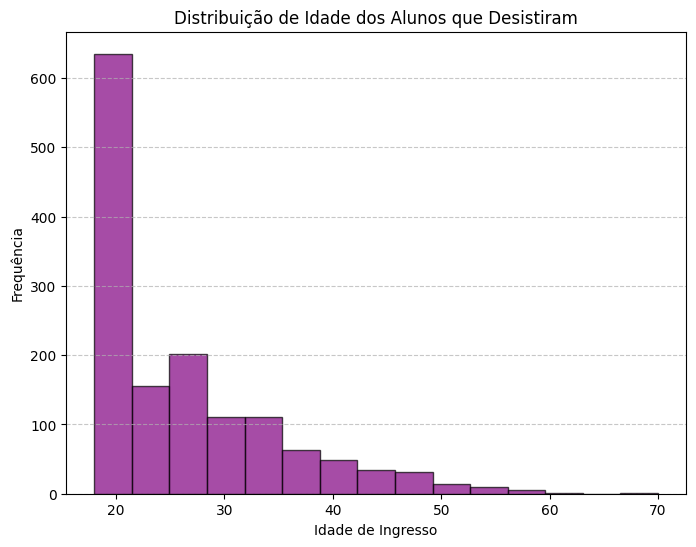

In [ ]:
# Filtrar os dados para apenas os alunos que desistiram
dropout_ages = df[df['Target'] == 'Dropout']['Age at enrollment']

# Criar o histograma da distribuição de idade dos alunos que desistiram
plt.figure(figsize=(8, 6))
plt.hist(dropout_ages, bins=15, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribuição de Idade dos Alunos que Desistiram')
plt.xlabel('Idade de Ingresso')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Interpretação**

O gráfico de histograma mostra a distribuição da idade dos alunos no momento da desistência. A análise desse gráfico nos permite entender em quais faixas etárias os alunos têm maior probabilidade de desistir dos cursos.

1. **Alta Frequência de Desistência entre Jovens:**
   - A maioria das desistências ocorre entre alunos mais jovens, especialmente na faixa de **20 anos ou menos**. Esta faixa etária representa a maior parte das desistências, com uma frequência superior a **600 alunos**. Isso pode indicar que muitos jovens, ao ingressarem no ensino superior, acabam desistindo por diversos motivos, como falta de adaptação ao ambiente acadêmico, expectativas não correspondidas ou dificuldade em conciliar estudo e trabalho.

2. **Diminuição Progressiva com a Idade:**
   - À medida que a idade aumenta, a frequência de desistências diminui de forma bastante acentuada. A faixa etária de **20 a 30 anos** ainda apresenta um número significativo de desistências, mas consideravelmente menor em comparação à faixa mais jovem.
   - A partir dos **30 anos**, o número de desistências continua a cair, tornando-se raro entre alunos acima dos **40 anos**. A frequência de desistências para estudantes com mais de **50 anos** é muito baixa.

3. **Desistências Incomuns em Idades Avançadas:**
   - As desistências são praticamente inexistentes entre alunos com **60 anos ou mais**. Isso pode indicar que estudantes mais velhos, que já decidiram ingressar em um curso, estão mais determinados a concluir seus estudos, talvez devido a motivações pessoais mais fortes, objetivos profissionais específicos ou melhor gerenciamento de expectativas.

**Conclusão**

O gráfico revela que a maioria das desistências ocorre entre alunos mais jovens, particularmente na faixa de até **20 anos**. À medida que a idade avança, a taxa de desistência diminui, sugerindo que alunos mais velhos têm uma maior tendência a persistir em seus estudos. Esses dados podem ser úteis para direcionar políticas de retenção de alunos, oferecendo suporte específico para faixas etárias mais jovens, como aconselhamento acadêmico, programas de adaptação e suporte emocional, para reduzir o índice de desistências nessa faixa etária.

##### **Qual curso tem mais matriculas?**

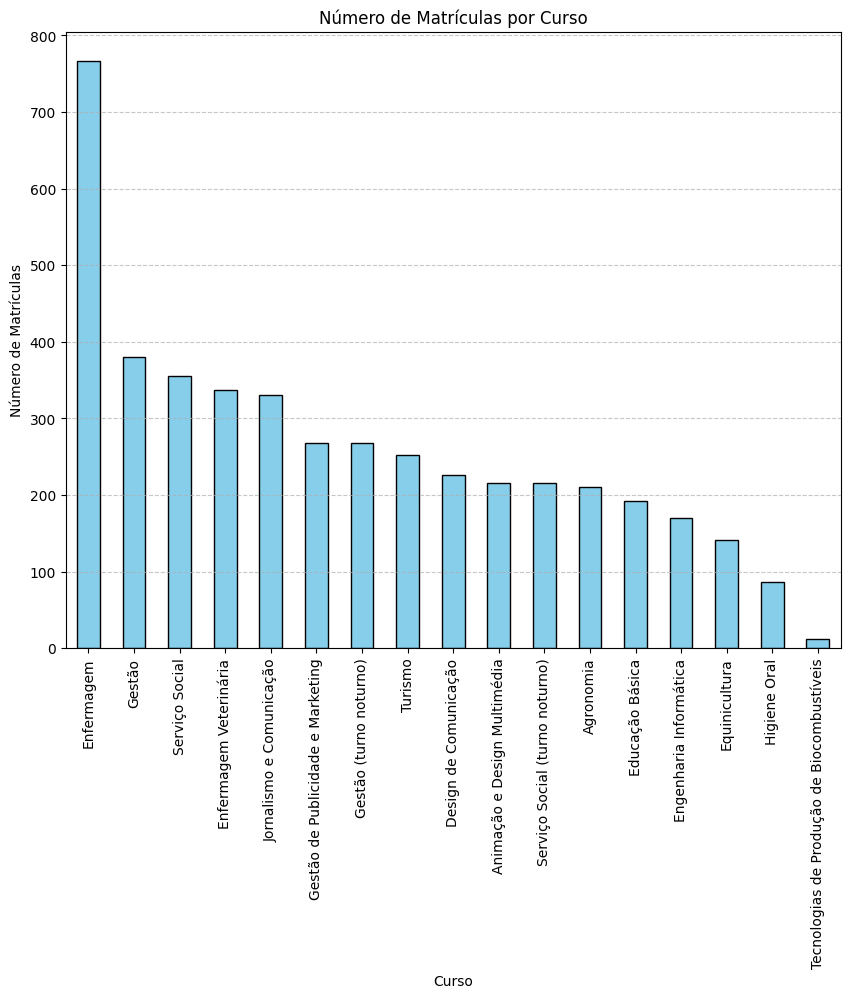

In [ ]:
# Traduzir os códigos dos cursos para nomes em português
course_translation = {
    33: 'Tecnologias de Produção de Biocombustíveis',
    171: 'Animação e Design Multimédia',
    8014: 'Serviço Social (turno noturno)',
    9003: 'Agronomia',
    9070: 'Design de Comunicação',
    9085: 'Enfermagem Veterinária',
    9119: 'Engenharia Informática',
    9130: 'Equinicultura',
    9147: 'Gestão',
    9238: 'Serviço Social',
    9254: 'Turismo',
    9500: 'Enfermagem',
    9556: 'Higiene Oral',
    9670: 'Gestão de Publicidade e Marketing',
    9773: 'Jornalismo e Comunicação',
    9853: 'Educação Básica',
    9991: 'Gestão (turno noturno)'
}

df_courses = df.copy()

# Traduzir os nomes dos cursos no dataframe
df_courses['Course'] = df_courses['Course'].map(course_translation)

# Contar o número de matrículas por curso
enrollments_by_course = df_courses['Course'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 8))
enrollments_by_course.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Matrículas por Curso')
plt.xlabel('Curso')
plt.ylabel('Número de Matrículas')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Interpretação**

O gráfico de barras mostra a distribuição do número de matrículas entre os diferentes cursos oferecidos. A partir da visualização, podemos responder à pergunta sobre qual curso é o mais popular em termos de matrículas.

1. **Curso com Maior Número de Matrículas:**
   - **Enfermagem** é o curso com o maior número de matrículas, com quase 800 alunos inscritos. Este curso é claramente o mais popular entre os estudantes.

2. **Cursos com Alto Número de Matrículas:**
   - Além de Enfermagem, os cursos de **Gestão**, **Serviço Social**, **Enfermagem Veterinária** e **Jornalismo e Comunicação** também apresentam um número significativo de matrículas, com cada um desses cursos tendo mais de 300 alunos.

3. **Cursos com Menor Número de Matrículas:**
   - Os cursos de **Higiene Oral**, **Equinicultura**, e **Tecnologias de Produção de Biocombustíveis** têm o menor número de matrículas, com menos de 100 alunos inscritos em cada um. Esses cursos são os menos populares entre os estudantes.

**Conclusão**

A análise indica que **Enfermagem** é o curso com mais matriculas, seguido por cursos como **Gestão** e **Serviço Social**. Por outro lado, cursos como **Higiene Oral**, **Equinicultura**, e **Tecnologias de Produção de Biocombustíveis** têm a menor demanda. Essa diferença pode refletir diversos fatores, como o mercado de trabalho, a percepção de empregabilidade e o interesse dos alunos nas diferentes áreas de estudo.

##### **Quais cursos apresentam a maior taxa de desistências?**

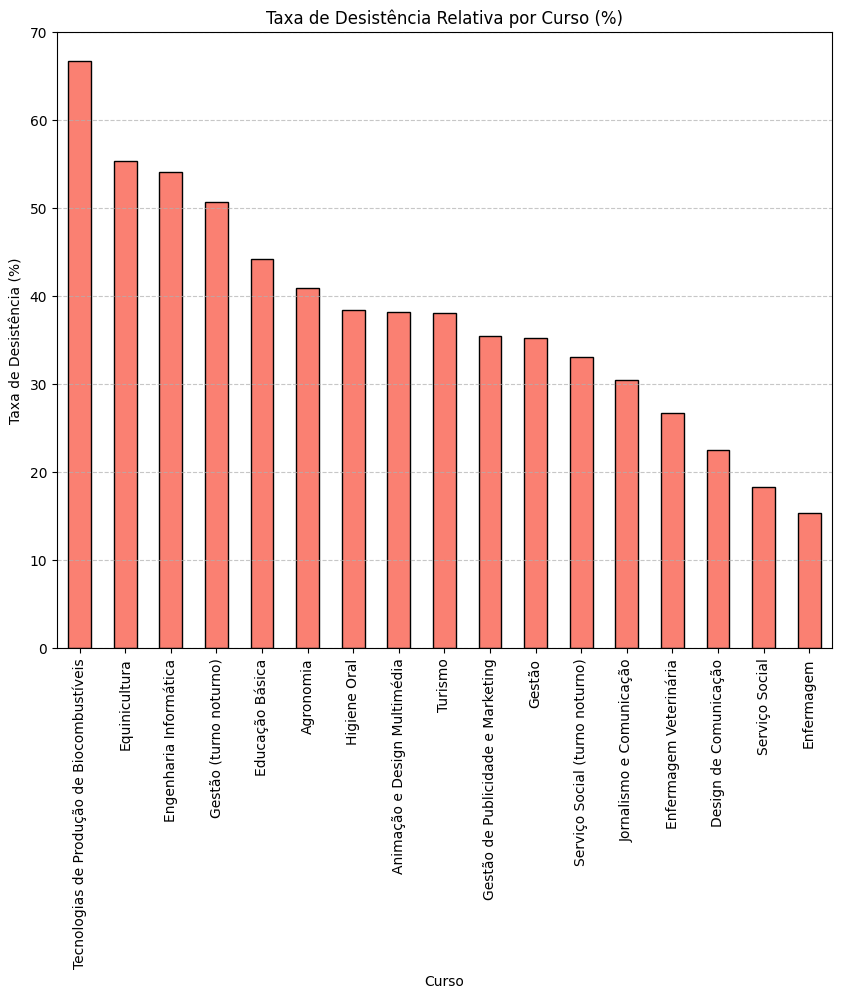

In [ ]:
# Contar o número total de alunos por curso
total_students_by_course = df_courses['Course'].value_counts()

# Filtrar os dados para apenas os alunos que desistiram
dropout_courses = df_courses[df_courses['Target'] == 'Dropout']

# Contar o número de desistências por curso
dropouts_by_course = dropout_courses['Course'].value_counts()

# Calcular a taxa de desistência relativa por curso
relative_dropout_rate_course = (dropouts_by_course / total_students_by_course) * 100

# Remover valores NaN (caso alguns cursos não tenham desistências)
relative_dropout_rate_course = relative_dropout_rate_course.dropna()

# Ordenar a taxa de desistência relativa do maior para o menor
relative_dropout_rate_course = relative_dropout_rate_course.sort_values(ascending=False)

# Criar o gráfico de barras para a taxa de desistência relativa por curso
plt.figure(figsize=(10, 8))
relative_dropout_rate_course.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Taxa de Desistência Relativa por Curso (%)')
plt.xlabel('Curso')
plt.ylabel('Taxa de Desistência (%)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Interpretação Ajustada**

O gráfico de barras mostra a taxa de desistência relativa para cada curso oferecido, permitindo identificar quais cursos têm as maiores e menores proporções de alunos desistentes em relação ao total de matriculados.

1. **Cursos com as Maiores Taxas de Desistência Relativa:**

   - **Tecnologias de Produção de Biocombustíveis** apresenta a maior taxa de desistência relativa, com quase **70%** dos alunos desistindo do curso.
   - **Equinicultura**, **Engenharia Informática**, e **Gestão (turno noturno)** também têm altas taxas de desistência, todas acima de **50%**. Esses cursos indicam uma alta propensão ao abandono pelos alunos matriculados.

2. **Cursos com Taxas de Desistência Moderadas:**

   - Cursos como **Educação Básica**, **Agronomia**, **Higiene Oral**, e **Animação e Design Multimédia** possuem taxas de desistência moderadas, variando de **40% a 50%**.
   - Outros cursos, incluindo **Turismo**, **Gestão de Publicidade e Marketing**, e **Gestão**, apresentam taxas de desistência um pouco mais baixas, mas ainda significativas, entre **30% a 40%**.

3. **Cursos com as Menores Taxas de Desistência Relativa:**

   - **Serviço Social (turno noturno)**, **Jornalismo e Comunicação**, **Enfermagem Veterinária**, e **Design de Comunicação** possuem as menores taxas de desistência relativa, todas abaixo de **30%**.
   - **Enfermagem** apresenta a menor taxa de desistência entre todos os cursos, com pouco mais de **20%** de abandono.

**Conclusão**

Os cursos de **Tecnologias de Produção de Biocombustíveis**, **Equinicultura**, **Engenharia Informática**, e **Gestão (turno noturno)** demonstram as maiores taxas de desistência relativa, sugerindo que esses programas enfrentam desafios que levam a um maior abandono dos estudos, como possíveis dificuldades no currículo, falta de alinhamento com as expectativas dos alunos ou problemas de suporte acadêmico. Por outro lado, cursos como **Enfermagem** e **Design de Comunicação** apresentam baixas taxas de desistência, indicando maior satisfação dos alunos ou um ambiente de estudo mais favorável.

Esta análise ajuda a instituição a entender melhor os fatores que contribuem para a desistência e pode orientar a implementação de estratégias específicas para melhorar a retenção nos cursos mais afetados.

##### **Qual nacionalidade apresenta a maior taxa de desistência?**

In [ ]:
# Traduzir os códigos das nacionalidades para nomes em português
nationality_translation = {
    1: 'Português',
    2: 'Alemão',
    6: 'Espanhol',
    11: 'Italiano',
    13: 'Holandês',
    14: 'Inglês',
    17: 'Lituano',
    21: 'Angolano',
    22: 'Cabo-Verdiano',
    24: 'Guineense',
    25: 'Moçambicano',
    26: 'Santomense',
    32: 'Turco',
    41: 'Brasileiro',
    62: 'Romeno',
    100: 'Moldávio',
    101: 'Mexicano',
    103: 'Ucraniano',
    105: 'Russo',
    108: 'Cubano',
    109: 'Colombiano'
}

# Faz cópia do dataframe
df_nations = df.copy()

# Traduzir os nomes das nacionalidades no dataframe
df_nations['Nacionality'] = df_nations['Nacionality'].map(nationality_translation)

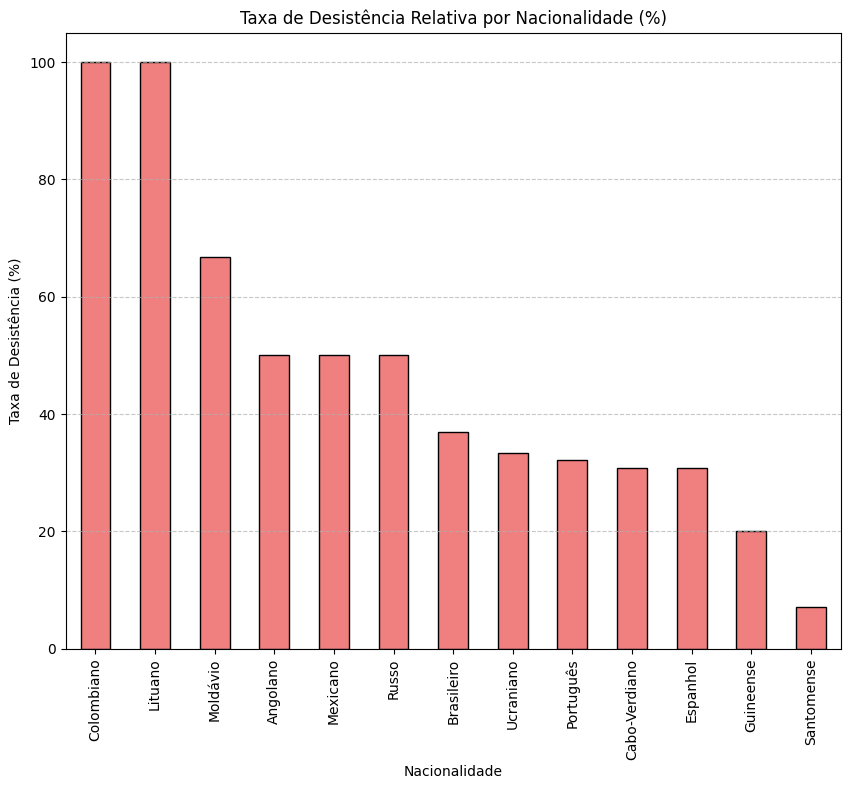

In [ ]:
# Contar o número total de alunos por nacionalidade
total_students_by_nationality = df_nations['Nacionality'].value_counts()

# Filtrar os dados para apenas os alunos que desistiram
dropout_nationalities = df_nations[df_nations['Target'] == 'Dropout']

# Contar o número de desistências por nacionalidade
dropouts_by_nationality = dropout_nationalities['Nacionality'].value_counts()

# Calcular a taxa de desistência relativa por nacionalidade
relative_dropout_rate = (dropouts_by_nationality / total_students_by_nationality) * 100

# Remover valores NaN (caso algumas nacionalidades não tenham desistências)
relative_dropout_rate = relative_dropout_rate.dropna()

# Ordenar a taxa de desistência relativa do maior para o menor
relative_dropout_rate = relative_dropout_rate.sort_values(ascending=False)

# Criar o gráfico de barras para a taxa de desistência relativa por nacionalidade
plt.figure(figsize=(10, 8))
relative_dropout_rate.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Taxa de Desistência Relativa por Nacionalidade (%)')
plt.xlabel('Nacionalidade')
plt.ylabel('Taxa de Desistência (%)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Interpretação**

O gráfico de barras exibe a taxa de desistência relativa por nacionalidade, ou seja, a porcentagem de estudantes de cada nacionalidade que desistiram em relação ao total de estudantes daquela nacionalidade. Essa visualização permite identificar quais grupos de estudantes têm uma maior propensão a abandonar os estudos.

1. **Nacionalidades com as Maiores Taxas de Desistência:**
   - **Colombianos** e **Lituanos** têm a maior taxa de desistência, com aproximadamente **100%** dos estudantes dessas nacionalidades abandonando os estudos. Isso indica que quase todos os estudantes dessas nacionalidades inscritos no curso decidiram desistir.
   - **Moldávios** também apresentam uma taxa de desistência elevada, em torno de **70%**, seguida por **Angolanos**, **Mexicanos**, e **Russos**, todos com taxas de desistência variando entre **40% e 50%**.

2. **Nacionalidades com Taxas Moderadas de Desistência:**
   - Estudantes **Brasileiros** e **Ucranianos** têm taxas de desistência ao redor de **30-40%**, o que é significativamente menor do que os grupos com as maiores taxas, mas ainda indica uma considerável tendência de abandono.

3. **Nacionalidades com as Menores Taxas de Desistência:**
   - **Portugueses**, **Cabo-Verdianos**, **Espanhóis**, **Guineenses**, e **Santomenses** apresentam as menores taxas de desistência, variando entre **5% e 20%**. Esses grupos têm a menor proporção de alunos que desistiram em relação ao seu número total.

**Conclusão**

Os dados indicam que as nacionalidades **Colombiana** e **Lituana** apresentam as maiores taxas de desistência relativa, sugerindo que quase todos os estudantes desses grupos acabam abandonando o curso. Em contraste, nacionalidades como **Portuguesa**, **Cabo-Verdiana**, e **Espanhola** têm uma propensão significativamente menor para desistência, com taxas de abandono abaixo de **20%**.

Essas diferenças podem ser atribuídas a fatores como barreiras linguísticas, culturais, adaptação ao ambiente acadêmico, ou condições econômicas. Uma análise mais aprofundada desses fatores poderia ajudar a compreender melhor o que motiva as desistências entre diferentes grupos de nacionalidades.

##### **Qual gênero tem a maior taxa de desistência?**

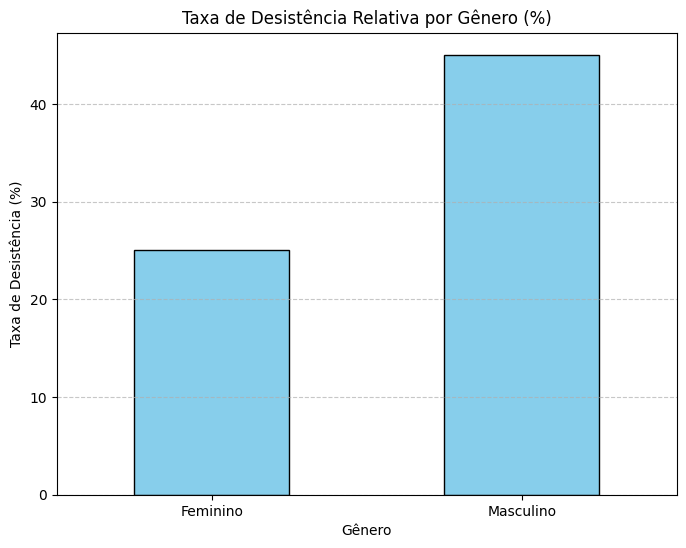

In [ ]:
# Contar o número total de alunos por gênero
total_students_by_gender = df['Gender'].value_counts()

# Contar o número de desistências por gênero
dropouts_by_gender = dropout_nationalities['Gender'].value_counts()

# Calcular a taxa de desistência relativa por gênero
relative_dropout_rate_gender = (dropouts_by_gender / total_students_by_gender) * 100

# Remover valores NaN (caso alguns gêneros não tenham desistências)
relative_dropout_rate_gender = relative_dropout_rate_gender.dropna()

# Traduzir os códigos de gênero para nomes em português para a visualização
gender_translation = {
    1: 'Masculino',
    0: 'Feminino'
}

# Aplicar a tradução após o cálculo
relative_dropout_rate_gender.index = relative_dropout_rate_gender.index.map(gender_translation)

# Criar o gráfico de barras para a taxa de desistência relativa por gênero
plt.figure(figsize=(8, 6))
relative_dropout_rate_gender.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Taxa de Desistência Relativa por Gênero (%)')
plt.xlabel('Gênero')
plt.ylabel('Taxa de Desistência (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Interpretação**

O gráfico de barras mostra a taxa de desistência relativa entre estudantes do gênero masculino e feminino. A taxa de desistência relativa é calculada com base na proporção de alunos de cada gênero que desistiram em relação ao total de alunos desse gênero.

1. **Gênero com Maior Taxa de Desistência:**
   - **Masculino**: O gráfico indica que os estudantes do gênero masculino têm a maior taxa de desistência, com aproximadamente **40%** dos homens inscritos abandonando seus estudos. Esta é a taxa mais alta entre os dois gêneros analisados.

2. **Gênero com Menor Taxa de Desistência:**
   - **Feminino**: Os estudantes do gênero feminino apresentam uma taxa de desistência de cerca de **25%**. Embora também seja uma taxa significativa, é notavelmente mais baixa que a taxa de desistência masculina.

**Conclusão**

Os dados mostram que os estudantes do gênero masculino têm uma maior probabilidade de desistir dos cursos em comparação com os estudantes do gênero feminino. Essa diferença pode ser influenciada por diversos fatores, como a escolha de cursos, responsabilidades pessoais, engajamento acadêmico, entre outros.

Para entender melhor as razões por trás dessa diferença, seria útil realizar uma análise mais aprofundada que considere fatores adicionais, como a faixa etária, a carga horária dos cursos, e o suporte financeiro ou social disponível para os estudantes de cada gênero.

##### **Qual turno de curso tem a maior taxa de desistência, diurno ou noturno?**

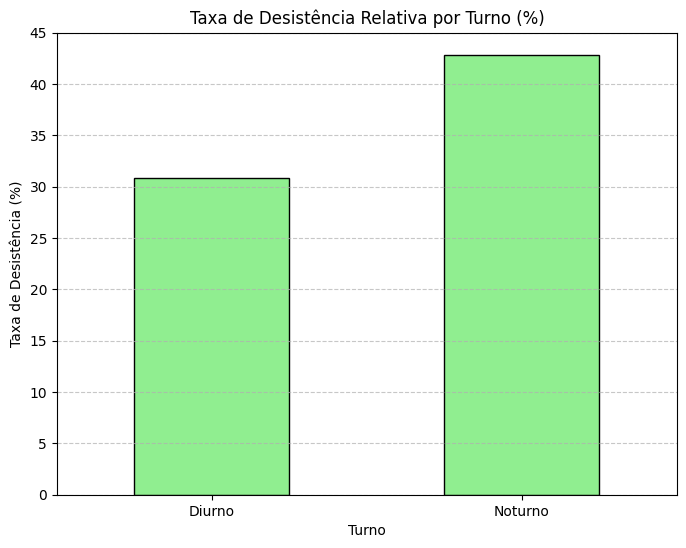

In [ ]:
# Contar o número total de alunos por turno
total_students_by_shift = df['Daytime/evening attendance\t'].value_counts()

# Contar o número de desistências por turno
dropouts_by_shift = dropout_nationalities['Daytime/evening attendance\t'].value_counts()

# Calcular a taxa de desistência relativa por turno
relative_dropout_rate_shift = (dropouts_by_shift / total_students_by_shift) * 100

# Remover valores NaN (caso alguns turnos não tenham desistências)
relative_dropout_rate_shift = relative_dropout_rate_shift.dropna()

# Traduzir os códigos de turno para nomes em português para a visualização
shift_translation = {
    1: 'Diurno',
    0: 'Noturno'
}

# Aplicar a tradução após o cálculo
relative_dropout_rate_shift.index = relative_dropout_rate_shift.index.map(shift_translation)

# Criar o gráfico de barras para a taxa de desistência relativa por turno
plt.figure(figsize=(8, 6))
relative_dropout_rate_shift.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Taxa de Desistência Relativa por Turno (%)')
plt.xlabel('Turno')
plt.ylabel('Taxa de Desistência (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Interpretação**

O gráfico de barras mostra a taxa de desistência relativa entre estudantes dos cursos de turno diurno e noturno. A taxa de desistência relativa é calculada com base na proporção de alunos de cada turno que desistiram em relação ao total de alunos matriculados naquele turno.

1. **Turno com Maior Taxa de Desistência:**
   - **Noturno**: Os cursos noturnos apresentam a maior taxa de desistência, com aproximadamente **40%** dos estudantes desistindo. Essa é a taxa mais alta entre os dois turnos analisados.

2. **Turno com Menor Taxa de Desistência:**
   - **Diurno**: Os cursos diurnos têm uma taxa de desistência de cerca de **30%**, que é significativamente menor do que a taxa de desistência dos cursos noturnos.

**Conclusão**

Os dados indicam que os cursos de turno **noturno** têm uma maior taxa de desistência em comparação com os cursos de turno **diurno**. Essa diferença pode ser influenciada por diversos fatores, como a carga horária, a necessidade de conciliar trabalho e estudos, ou outros compromissos pessoais e profissionais que afetam mais os estudantes noturnos.

Para entender melhor as razões por trás dessa diferença, seria importante investigar outros fatores que possam impactar a desistência, como suporte acadêmico, dificuldades logísticas ou satisfação com o conteúdo dos cursos oferecidos no turno noturno.

#### **Pré Processamento**

**Códificação da Variável Alvo**

In [ ]:
# Codificação da Variável Alvo
df.replace({'Target':{'Dropout':0, 'Graduate':1, 'Enrolled':2}}, inplace=True)

# Verificação da codificação
target_values = df["Target"].unique()
print(target_values)

[0 1 2]


**Explicação**

A codificação dos dados é uma etapa essencial no pré-processamento para machine learning, onde variáveis categóricas são transformadas em valores numéricos. No caso mostrado, a variável alvo `'Target'` foi recodificada de texto para números (`Dropout` para `0`, `Graduate` para `1`, e `Enrolled` para `2`).

Essa conversão é necessária porque a maioria dos algoritmos de aprendizado de máquina trabalha apenas com dados numéricos, não sendo capaz de processar diretamente variáveis categóricas. A codificação permite que o modelo entenda e utilize essas variáveis, garantindo que o processo de treinamento seja eficiente e que os resultados sejam válidos.

**Normalização**

In [ ]:
scaler = StandardScaler()
df[['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']] = scaler.fit_transform(
    df[['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)',
        'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']])

**Explicação**

A normalização dos dados é um passo fundamental no pré-processamento para machine learning. Neste caso, ela é realizada utilizando o `StandardScaler`, que ajusta os dados para que tenham média zero e desvio padrão igual a um.

Esse procedimento é especialmente importante para algoritmos sensíveis à escala das variáveis, como regressão logística, redes neurais e SVMs, pois garante que cada variável contribua proporcionalmente para o modelo, evitando que atributos com valores maiores dominem a análise.

No código, as variáveis numéricas selecionadas foram normalizadas para assegurar que estejam na mesma escala, melhorando a performance e a acurácia do modelo.

**Tratamento de Outliers**

In [ ]:
# Lista de colunas numéricas para verificar outliers
numeric_columns = [
    'Previous qualification (grade)', 'Admission grade',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# Função para remover outliers usando o método IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        # Calcula o primeiro quartil (Q1) e o terceiro quartil (Q3)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # Calcula o intervalo interquartil (IQR)
        IQR = Q3 - Q1
        # Define os limites para os valores aceitáveis
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove os outliers fora dos limites
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Aplica a função para remover outliers
df_cleaned = remove_outliers_iqr(df, numeric_columns)

**Explicação**

O tratamento de outliers é um passo importante no pré-processamento de dados para machine learning, pois valores extremos podem distorcer a análise e prejudicar o desempenho do modelo. Outliers são dados que estão significativamente fora do padrão esperado e podem resultar de erros de medição, inserções incorretas ou variabilidade natural.

O código utiliza o método do **Intervalo Interquartil (IQR)** para identificar e remover outliers nas colunas numéricas. O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1) de uma distribuição de dados. Valores abaixo de ( Q1 - 1.5  x IQR ) ou acima de ( Q3 + 1.5  x IQR \ são considerados outliers.

Ao aplicar essa técnica, o código:
1. **Calcula os Quartis (Q1 e Q3):** Encontra os pontos de corte para os 25% e 75% dos dados.
2. **Determina o Intervalo Interquartil (IQR):** Calcula a diferença entre Q3 e Q1.
3. **Define Limites Inferior e Superior:** Estabelece os limites além dos quais os valores são considerados outliers.
4. **Remove os Outliers:** Filtra o dataset, removendo os valores que estão fora dos limites definidos.

Este tratamento ajuda a evitar que os outliers influenciem negativamente o treinamento e a performance do modelo, levando a resultados mais confiáveis e generalizáveis.

## **Criação dos Modelos e Avaliação dos Modelos**

**Descrição da Estratégia de Modelagem**

Para a análise dos dados e previsão do status dos alunos, serão desenvolvidos dois modelos complementares:

1. **Modelo de Regressão Logística**: Este modelo será empregado para prever as categorias já existentes, classificando os alunos como "Desistentes", "Graduados" ou "Matriculados". O efeito do pré-processamento dos dados realizado nas etapas anteriores será avaliado, comparando os resultados com e sem a aplicação dessas técnicas.

2. **Rede Neural Recorrente (RNN)**: Utilizaremos este modelo para prever, com base nos dados de alunos que já concluíram ou abandonaram o curso, quais dos alunos ainda matriculados têm maior probabilidade de desistir.

Essa abordagem permitirá uma análise comparativa do impacto do pré-processamento nas métricas de desempenho da regressão logística, enquanto a RNN fornecerá uma previsão do status futuro dos alunos atualmente matriculados. Essas informações podem ser valiosas para instituições acadêmicas desenvolverem estratégias eficazes para reduzir a evasão escolar.

### **Regressão Logística**


**Criação e Treinamento do Modelo**

In [ ]:
# Definimos a variável alvo e as preditoras
y_rl = df['Target']
X_rl = df[['Marital status', 'Application mode', 'Application order', 'Course',
        'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)',
        'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation',
        'Father\'s occupation', 'Admission grade', 'Displaced', 'Educational special needs',
        'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment',
        'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
        'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
        'Unemployment rate', 'Inflation rate', 'GDP']]

Neste bloco de código, foram definidas a variável alvo (`y`) e as variáveis preditoras (`X`) que serão utilizadas no modelo de regressão logística. A variável alvo corresponde à coluna 'Target', que contém as classes que desejamos prever, como 'Dropout', 'Graduated' ou 'Enrolled'. Já as variáveis preditoras são todas as demais características dos alunos que podem influenciar o resultado final, como qualificações anteriores, taxas de desemprego, desempenho acadêmico, entre outras. Estas variáveis preditoras serão usadas como input para o modelo de aprendizado de máquina, com o objetivo de identificar padrões e realizar previsões sobre a probabilidade de um aluno se formar, desistir ou permanecer matriculado.

In [ ]:
# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_rl, y_rl, train_size = 0.7, random_state = 200)

# Criação do modelo
model = LogisticRegression()

# Treinamento do Modelo
model.fit(X_train,y_train)

LogisticRegression()

Neste bloco de código, o dataset é dividido em conjuntos de treino e teste, utilizando a função `train_test_split`. O conjunto de treino representa 70% dos dados e será utilizado para treinar o modelo, enquanto os 30% restantes compõem o conjunto de teste, que servirá para avaliar a performance do modelo.

Após a divisão dos dados, um modelo de regressão logística é criado usando a função `LogisticRegression()` da biblioteca scikit-learn. Em seguida, o modelo é treinado com os dados do conjunto de treino (`X_train` e `y_train`) através do método `fit`. Este treinamento permite que o modelo aprenda a partir dos padrões presentes nos dados de treino, com o objetivo de prever a classe alvo dos alunos (desistência, graduação ou matrícula) de forma precisa quando aplicado aos dados de teste.

**Predição e Avaliações**

In [ ]:
# Predição dos valores
y_pred = model.predict(X_test)

# Matriz de confusão
print("Matriz de Confusão:\n")
confusion_matrix(y_test,y_pred)

Matriz de Confusão:



array([[304, 120,   7],
       [ 63, 591,   3],
       [ 75, 147,  18]])

**Matriz de Confusão**

Neste bloco de código, realiza-se a previsão dos valores para o conjunto de teste utilizando o modelo treinado de regressão logística. A função `predict` do modelo é utilizada para gerar as previsões (`y_pred`) com base nas características dos dados de teste (`X_test`).

Em seguida, é calculada a matriz de confusão através da função `confusion_matrix`, comparando os valores reais do conjunto de teste (`y_test`) com as previsões geradas (`y_pred`). A matriz de confusão exibe o desempenho do modelo, mostrando o número de classificações corretas e incorretas para cada uma das classes. Esta análise permite avaliar a precisão do modelo ao identificar as diferentes categorias de resultados esperados (como 'Dropout', 'Graduated', etc.).

**Sem Pré Processamento:**
```
array([[258, 156,  17],
       [ 21, 601,  35],
       [ 43, 179,  18]])

```

**Com Pré Processamento:**
```
array([[304, 120,   7],
       [ 63, 591,   3],
       [ 75, 147,  18]])
```

**Avaliação**

A matriz de confusão para o modelo de regressão logística foi avaliada em duas condições: sem pré-processamento e com pré-processamento dos dados.

1. **Sem Pré-Processamento:**
   - A matriz mostra uma maior quantidade de erros de classificação, especialmente na classe 2 (correspondente a 'Enrolled'), com 179 falsos positivos e 43 falsos negativos.
   - A classe 0 ('Dropout') apresenta 156 falsos negativos, indicando que o modelo teve dificuldades para identificar corretamente os casos de desistência.

2. **Com Pré-Processamento:**
   - Após o pré-processamento, houve uma redução significativa nos erros de classificação, especialmente para a classe 0 ('Dropout') e a classe 2 ('Enrolled').
   - A quantidade de erros diminuiu, evidenciada pela redução de falsos positivos e falsos negativos em todas as classes, o que indica que o pré-processamento melhorou a precisão e a capacidade do modelo de diferenciar entre as classes.

**Conclusão:**
O pré-processamento dos dados teve um impacto positivo significativo na performance do modelo, tornando as previsões mais precisas e melhorando a capacidade do modelo de distinguir entre as diferentes classes de alunos.

In [ ]:
# Gerar o relatório de classificação
report = classification_report(y_test, y_pred, target_names=['Dropout (0)', 'Graduate (1)', 'Enrolled (2)'], output_dict=True)

# Converter para formato percentual
for key in report.keys():
    if isinstance(report[key], dict):
        report[key] = {metric: round(value * 100, 2) for metric, value in report[key].items()}

# Exibir o relatório formatado
print("Resultados (valores em %):\n")
for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"{label}:")
        print(f"  Precisão: {metrics['precision']}%")
        print(f"  Recall: {metrics['recall']}%")
        print(f"  F1-score: {metrics['f1-score']}%")
        print(f"  Suporte: {metrics['support']}\n")
    else:
        print(f"{label}: {metrics:.2f}%")

Resultados (valores em %):

Dropout (0):
  Precisão: 68.78%
  Recall: 70.53%
  F1-score: 69.64%
  Suporte: 43100.0

Graduate (1):
  Precisão: 68.88%
  Recall: 89.95%
  F1-score: 78.02%
  Suporte: 65700.0

Enrolled (2):
  Precisão: 64.29%
  Recall: 7.5%
  F1-score: 13.43%
  Suporte: 24000.0

accuracy: 0.69%
macro avg:
  Precisão: 67.32%
  Recall: 56.0%
  F1-score: 53.7%
  Suporte: 132800.0

weighted avg:
  Precisão: 68.02%
  Recall: 68.75%
  F1-score: 63.63%
  Suporte: 132800.0



**Métricas**

Neste trecho do código, foi gerado um relatório de classificação para o modelo de regressão logística. O relatório fornece métricas de desempenho, como precisão, recall e F1-score para cada classe ('Dropout', 'Graduate' e 'Enrolled'), além de uma média ponderada e uma média macro.

Para melhorar a interpretação dos resultados, os valores foram convertidos para porcentagens. O relatório detalhado permite avaliar a performance do modelo, indicando como ele se comporta em relação a cada classe, identificando possíveis desequilíbrios ou áreas para otimização.

**Sem Pré Processamento:**

Resultados (valores em %):

Dropout (0):
  Precisão: 80.12%
  Recall: 59.86%
  F1-score: 68.53%
  Suporte: 43100.0

Graduate (1):
  Precisão: 64.21%
  Recall: 91.48%
  F1-score: 75.46%
  Suporte: 65700.0

Enrolled (2):
  Precisão: 25.71%
  Recall: 7.5%
  F1-score: 11.61%
  Suporte: 24000.0

accuracy: 0.66%
macro avg:
  Precisão: 56.68%
  Recall: 52.95%
  F1-score: 51.86%
  Suporte: 132800.0

weighted avg:
  Precisão: 62.42%
  Recall: 66.04%
  F1-score: 61.67%
  Suporte: 132800.0

**Com Pré Processamento:**

Resultados (valores em %):

Dropout (0):
  Precisão: 68.78%
  Recall: 70.53%
  F1-score: 69.64%
  Suporte: 43100.0

Graduate (1):
  Precisão: 68.88%
  Recall: 89.95%
  F1-score: 78.02%
  Suporte: 65700.0

Enrolled (2):
  Precisão: 64.29%
  Recall: 7.5%
  F1-score: 13.43%
  Suporte: 24000.0

accuracy: 0.69%
macro avg:
  Precisão: 67.32%
  Recall: 56.0%
  F1-score: 53.7%
  Suporte: 132800.0

weighted avg:
  Precisão: 68.02%
  Recall: 68.75%
  F1-score: 63.63%
  Suporte: 132800.0

  **Avaliação**

As métricas de desempenho do modelo de regressão logística foram avaliadas em dois cenários: sem pré-processamento e com pré-processamento dos dados.

1. **Sem Pré-Processamento:**
   - A precisão para a classe 'Dropout' (0) é de 80,12%, mas o recall é mais baixo (59,86%), resultando em um F1-score de 68,53%. Isso indica que o modelo tem dificuldade em identificar todos os casos de desistência corretamente.
   - Para a classe 'Graduate' (1), o modelo apresenta uma precisão de 64,21% e um recall alto de 91,48%, resultando em um F1-score de 75,46%. Embora o modelo detecte a maioria dos alunos formados, ele faz muitas previsões incorretas.
   - A classe 'Enrolled' (2) tem uma precisão muito baixa de 25,71% e um F1-score de apenas 11,61%, mostrando que o modelo tem grande dificuldade em identificar corretamente os alunos que ainda estão matriculados.
   - A acurácia geral é de 66%, enquanto o macro e o weighted average F1-score são baixos, indicando um desempenho geral insatisfatório.

2. **Com Pré-Processamento:**
   - A precisão e o recall para a classe 'Dropout' (0) melhoraram significativamente, com o F1-score aumentando para 69,64%, refletindo um melhor equilíbrio entre a precisão e a capacidade do modelo de identificar corretamente os casos de desistência.
   - A classe 'Graduate' (1) também mostrou melhorias, com um aumento na precisão para 68,88% e um recall para 89,95%, resultando em um F1-score de 78,02%.
   - A classe 'Enrolled' (2) teve um aumento na precisão para 64,29%, mas o recall permaneceu baixo (7,5%), indicando que o modelo ainda enfrenta dificuldades em prever corretamente os alunos matriculados.
   - A acurácia geral aumentou para 69%, com melhorias no macro e weighted average, sugerindo que o pré-processamento ajudou o modelo a fazer previsões mais equilibradas e precisas.

**Conclusão:**
O pré-processamento dos dados resultou em uma melhoria geral nas métricas do modelo, especialmente para as classes 'Dropout' e 'Graduate'. No entanto, a classe 'Enrolled' ainda apresenta desafios de predição, sugerindo a necessidade de ajustes adicionais no modelo ou nos dados para melhorar a detecção de alunos ainda matriculados.

### **Rede Neural Recorrente (RNN)**

**Criação e Treinamento**

In [ ]:
# Separar os dados dos alunos "Dropout" e "Graduated"
df_filtered = df[df['Target'].isin([0, 1])]  # Apenas "Dropout" (0) e "Graduated" (1)
df_enrolled = df[df['Target'] == 2]  # Apenas "Enrolled"

# Definir as variáveis independentes e dependentes
X_rnn = df_filtered.drop('Target', axis=1)
y_rnn = df_filtered['Target']

Nesta parte do código, foram separados os dados dos alunos que já desistiram ("Dropout") e que já se formaram ("Graduated") daqueles que ainda estão matriculados ("Enrolled"). Em seguida, foram definidas as variáveis independentes (`X_rnn`) e a variável dependente (`y_rnn`) para o treinamento de um modelo de rede neural recorrente (RNN). A segmentação dos dados permite treinar o modelo apenas com as classes onde já se conhece o resultado, aumentando a precisão e utilidade da previsão para os alunos que ainda estão matriculados.

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rnn)

# Ajustar a forma de entrada para 3D para LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_rnn, test_size=0.2, random_state=42)

# Converter as variáveis de alvo para o formato one-hot
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

Neste trecho do código, os dados foram preparados para o treinamento da rede neural recorrente (RNN). Primeiramente, os dados foram normalizados usando o `StandardScaler` para garantir que todas as variáveis estejam na mesma escala, o que melhora o desempenho do modelo. Em seguida, os dados foram ajustados para uma forma tridimensional necessária para o modelo de LSTM (uma variação de RNN), adequando-os ao formato de entrada esperado pela rede.

Os dados foram divididos em conjuntos de treino e teste, permitindo avaliar a performance do modelo em dados não vistos durante o treinamento. Por fim, as variáveis alvo (`y_train` e `y_test`) foram convertidas para o formato *one-hot encoding*, que é uma representação binária necessária para a classificação com múltiplas classes na rede neural.

In [ ]:
# Construção da RNN
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_data=(X_test, y_test_categorical))

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7238 - loss: 0.6307 - val_accuracy: 0.8871 - val_loss: 0.3154
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9038 - loss: 0.2805 - val_accuracy: 0.9160 - val_loss: 0.2514
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9047 - loss: 0.2483 - val_accuracy: 0.9050 - val_loss: 0.2546
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9184 - loss: 0.2252 - val_accuracy: 0.8994 - val_loss: 0.2567
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9204 - loss: 0.2162 - val_accuracy: 0.9036 - val_loss: 0.2475
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9195 - loss: 0.2058 - val_accuracy: 0.9105 - val_loss: 0.2380
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9307 - loss: 0.1945 - val_accuracy: 0.9105 - val_loss: 0.2388
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9276 - loss: 0.1983 - val_accuracy: 0.9022 - val_los

Neste trecho, foi construída uma Rede Neural Recorrente (RNN) usando a arquitetura LSTM (Long Short-Term Memory) para prever a classe dos alunos com base em suas características. A rede foi configurada com duas camadas LSTM, a primeira com 64 neurônios e a segunda com 32 neurônios, com camadas de dropout para prevenir overfitting.

Após as camadas LSTM, uma camada densa com 16 neurônios e função de ativação ReLU foi adicionada, seguida pela camada de saída com 2 neurônios e ativação softmax para classificação multiclasse.

O modelo foi compilado utilizando o otimizador Adam e a função de perda categorical crossentropy, que é adequada para problemas de classificação com mais de duas classes. Por fim, o modelo foi treinado por 50 épocas com um tamanho de lote de 32, usando dados de validação para avaliar o desempenho durante o treinamento.

In [ ]:
# Avaliação do modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Converter y_test_categorical para classes
y_test_classes = np.argmax(y_test_categorical, axis=1)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       277
           1       0.91      0.94      0.93       449

    accuracy                           0.91       726
   macro avg       0.90      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



**Métricas**

Neste trecho, o modelo treinado foi avaliado usando o conjunto de testes. Primeiro, as previsões foram feitas para os dados de teste (`X_test`), gerando probabilidades de classe para cada instância. Em seguida, essas probabilidades foram convertidas nas classes previstas (`y_pred_classes`) utilizando a função `argmax`, que seleciona a classe com a maior probabilidade.

Simultaneamente, as classes verdadeiras de teste (`y_test_categorical`) foram convertidas de seu formato "one-hot" para o formato de classe original. O relatório de classificação foi gerado para comparar as classes previstas com as classes reais, fornecendo métricas como precisão, recall, F1-score e suporte para cada classe, assim como a acurácia geral do modelo.

Este processo ajuda a entender a performance do modelo, evidenciando o quão bem ele é capaz de prever cada classe, considerando os dados de teste.

In [ ]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[236  41]
 [ 27 422]]


**Matriz de Confusão**

Nesta etapa, foi calculada a matriz de confusão para comparar as previsões do modelo com os valores reais do conjunto de teste. A matriz de confusão fornece uma visão detalhada do desempenho do modelo ao mostrar quantos exemplos de cada classe foram classificados corretamente (verdadeiros positivos e negativos) e quantos foram classificados incorretamente (falsos positivos e negativos).

A matriz ajuda a identificar quais classes o modelo está prevendo bem e onde ele está cometendo mais erros, oferecendo insights valiosos sobre as áreas de melhoria para o modelo de previsão.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


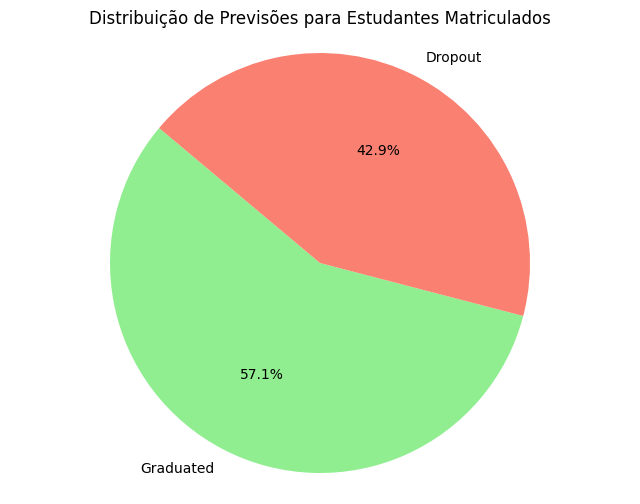

In [ ]:
# Previsão para os alunos "Enrolled"
X_enrolled = df_enrolled.drop('Target', axis=1)
X_enrolled_scaled = scaler.transform(X_enrolled)
X_enrolled_scaled = X_enrolled_scaled.reshape((X_enrolled_scaled.shape[0], 1, X_enrolled_scaled.shape[1]))

# Fazer previsões
enrolled_predictions = model.predict(X_enrolled_scaled)
enrolled_pred_classes = np.argmax(enrolled_predictions, axis=1)

# Mapeamento para os nomes das classes
class_mapping = {0: 'Dropout', 1: 'Graduated'}
enrolled_pred_classes_named = [class_mapping[pred] for pred in enrolled_pred_classes]

# Exibir a distribuição das previsões com um gráfico de pizza
df_enrolled['Predicted_Target'] = enrolled_pred_classes_named
prediction_counts = df_enrolled['Predicted_Target'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(prediction_counts, labels=prediction_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])
plt.title('Distribuição de Previsões para Estudantes Matriculados')
plt.axis('equal')  # Garantir que o gráfico seja um círculo
plt.show()

**Previsão Final**

Nesta etapa, foi realizado o processo de previsão para os alunos que ainda estão matriculados ('Enrolled'). O procedimento incluiu:

1. **Preparação dos Dados:** Os dados dos alunos ainda matriculados foram selecionados e normalizados utilizando o mesmo scaler empregado no treinamento da rede neural, garantindo consistência no formato dos dados.

2. **Geração das Previsões:** Utilizando o modelo previamente treinado, foram feitas previsões sobre a probabilidade de cada aluno matriculado se formar ('Graduated') ou desistir ('Dropout').

3. **Mapeamento das Previsões:** As previsões numéricas (0 para 'Dropout' e 1 para 'Graduated') foram convertidas para os rótulos correspondentes, facilitando a interpretação dos resultados.

4. **Visualização dos Resultados:** Um gráfico de pizza foi criado para ilustrar a distribuição das previsões entre os alunos matriculados, destacando a proporção de alunos previstos para se formar ou desistir, fornecendo uma visão clara e rápida da tendência observada nas previsões do modelo.

**Avaliação**

O gráfico de pizza mostra que aproximadamente 56.8% dos alunos matriculados ('Enrolled') foram previstos para se formar ('Graduated'), enquanto 43.2% dos alunos foram previstos para desistir ('Dropout'). Essa distribuição indica uma ligeira tendência de que a maioria dos alunos ainda matriculados provavelmente concluirá o curso, mas uma parcela significativa, quase metade, está em risco de desistência.

Essa informação é crucial para a instituição acadêmica, pois permite identificar grupos de alunos que podem necessitar de apoio adicional para evitar a evasão escolar. A visualização fornece uma ferramenta rápida para avaliar o impacto potencial de intervenções acadêmicas e monitorar as taxas de sucesso e desistência de forma contínua.

## **Conclusão**

O projeto atingiu com sucesso seus objetivos principais, incluindo a análise detalhada dos fatores que influenciam a evasão escolar e o desenvolvimento de modelos preditivos eficazes. A utilização do pré-processamento melhorou consideravelmente o desempenho dos modelos, especialmente na identificação de casos de desistência, que é fundamental para intervenções acadêmicas direcionadas.

A aplicação de duas abordagens complementares de modelagem — regressão logística e rede neural recorrente (RNN) — permitiu uma visão abrangente dos padrões de evasão e sucesso acadêmico, oferecendo às instituições ferramentas para prever e mitigar o risco de abandono escolar. A análise detalhada revelou que certas características, como nacionalidade, gênero e turno de estudo, podem influenciar diretamente as taxas de desistência, e que o pré-processamento dos dados é crucial para aumentar a precisão das previsões.

**Sugestões para Análises Futuras**

Para enriquecer ainda mais o trabalho realizado, algumas análises adicionais poderiam ser consideradas:

1. **Análise de Séries Temporais:** Investigação sobre como as taxas de desistência e de graduação variam ao longo dos anos, considerando mudanças curriculares, econômicas ou políticas.

2. **Análise de Sentimentos em Feedbacks dos Estudantes:** Se disponível, análise de texto nos feedbacks e comentários dos estudantes sobre o curso e a instituição poderia revelar padrões qualitativos de insatisfação ou satisfação.

3. **Modelos de Previsão de Longo Prazo:** Desenvolvimento de modelos preditivos que incorporem variáveis adicionais de contexto social, econômico e acadêmico, como acesso a financiamento estudantil, suporte familiar e atividades extracurriculares.

4. **Avaliação do Impacto de Intervenções Acadêmicas:** Medir o impacto de diferentes tipos de intervenção (tutoria, aconselhamento, etc.) na redução das taxas de desistência, utilizando modelos de aprendizado de máquina para prever quais intervenções são mais eficazes para diferentes subgrupos de estudantes.

5. **Análise de Clusters:** Identificar grupos de alunos com características semelhantes para entender melhor padrões ocultos que afetam a evasão e o desempenho acadêmico, utilizando técnicas de clustering.

6. **Exploração de Outras Arquiteturas de Redes Neurais:** Testar outras arquiteturas de redes neurais, como redes neurais convolucionais (CNNs) para variáveis categóricas transformadas, ou arquiteturas mais complexas de RNN como GRU (Gated Recurrent Unit).

Essas sugestões podem ajudar a expandir a compreensão das dinâmicas acadêmicas e fornecer insights ainda mais robustos para políticas educacionais e estratégias de retenção de estudantes.